# Best Response Dynamics

Author: Yuya Furusawa

*Graduate School of Economics, University of Tokyo*

This note demonstrates the best response dynamics model and its related models with `quantecon.game_theory` Python library.

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from quantecon.game_theory.brd import BRD, KMR, SamplingBRD

We illustrate the dynamics of players' actions with **coordination game** and **Young's game**.

Coordination game is defined as follows:

1$\backslash$2 | $A$           | $B$ 
 ------------- |---------------| ---------
 $A$           | 2, 2          |   0, 0   
 $B$           | 0, 0          |   1, 1   

In [2]:
coordination_game_matrix = [[2, 0],
                            [0, 1]]

Young's game is defined as follows:

1$\backslash$2 | $A$           | $B$      | $C$
 ------------- |---------------| ---------| --------
 $A$           | 6, 6          |   0, 0   |   0, 0
 $B$           | 5, 5          |   7, 7   |   5, 5
 $C$           | 0, 0          |   5, 5   |   8, 8


In [3]:
young_game_matrix = [[6, 0, 0],
                     [5, 7, 5],
                     [0, 5, 8]]

The number of agents is set to zero and the length of time series is 200.

In [4]:
N = 10
ts_length = 200

Define the function to plot the graph.

In [5]:
def plot_graph(brd, ts_length, init_action_dist, random_state=None):
    series = brd.time_series(ts_length, init_action_dist=init_action_dist, random_state=random_state)
    action_label = ['A', 'B', 'C']
    fig, ax = plt.subplots(figsize=(8,5))
    for h in range(brd.num_actions):
        ax.plot(series[:, h], linewidth=2, label='action {0}'.format(action_label[h]))
    ax.set_ylim(0, N+1)
    plt.legend(loc=4)
    plt.show()

## Best Response Dynamics

In evolutionary game theory, best response dynamics represents a class of strategy updating rules, where each player's strategy in the next round is determined by their best response to subset of population.

### Coordination Game

In [6]:
brd_coor = BRD(coordination_game_matrix, N=N)

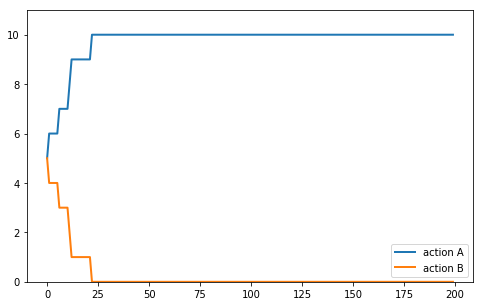

In [7]:
m = 5
plot_graph(brd_coor, ts_length, [m, N-m])

### Young's Game

In [8]:
brd_young = BRD(young_game_matrix, N=N)

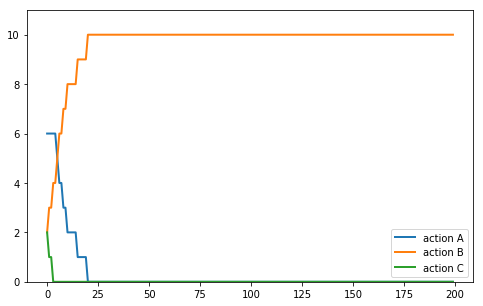

In [9]:
m = 2
plot_graph(brd_young, ts_length, [N-2*m, m, m])

## Kandori-Mailath-Rob model (KMR model)

Kandori, Mailath and Rob(1993) consider the evolutional model with noises or mutations.
In this model, long-run equilibrium satisfies Harsanyi and Selten's(1998) criterion of risk-dominance for 2$\times$2 symmetric games with two symmetric strict Nash equilibria.

### Coordination Game

In [10]:
kmr_coor = KMR(coordination_game_matrix, N=N)

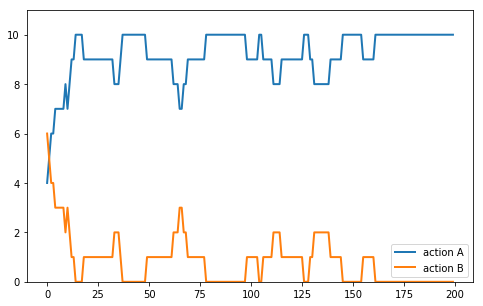

In [11]:
m = 4
plot_graph(kmr_coor, ts_length, [m, N-m])

This graph shows (A,A) is the long-run equilibrium which is a risk-dominance equilibrium.

### Young's Game

In [12]:
kmr_young = KMR(young_game_matrix, N=N)

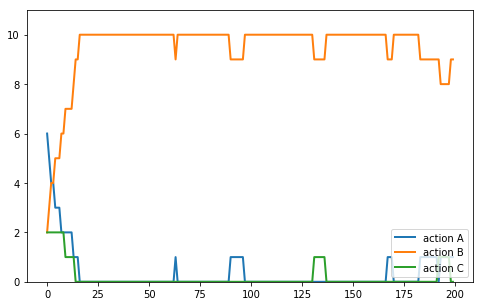

In [13]:
m = 2
plot_graph(kmr_young, ts_length, [N-2*m, m, m])

## Sampling Best Response Dynamics

### Coordination Game

In [14]:
sbrd_coor = SamplingBRD(coordination_game_matrix, N=N)

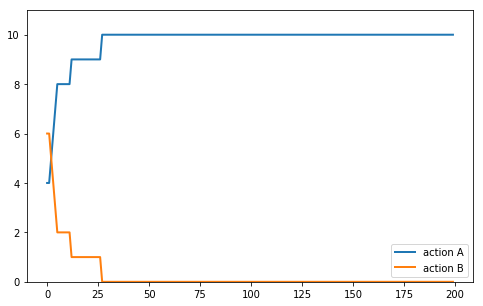

In [15]:
m = 4
plot_graph(sbrd_coor, ts_length, [m, N-m])

### Young's Game

In [16]:
sbrd_young = SamplingBRD(young_game_matrix, N=N)

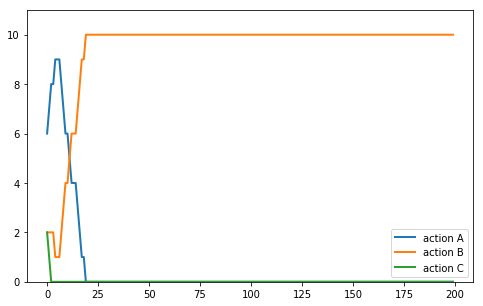

In [17]:
m = 2
plot_graph(sbrd_young, ts_length, [N-2*m, m, m])

---

## Reference

- Kandori, Mailath and Rob(1993), "Learning, Mutation, and Long Run Equilibria in Games.", Econometrica, vol.61, No.1, 26-59
- Oyama, Sandholm and Tercieux(2015), "Sampling best response dynamics and deterministic equilibirum selection", Theoretical Economics, 10, 243-281